In [1]:
pip install datasets nltk


In [9]:
pip install -U datasets huggingface_hub fsspec


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 1

In [15]:
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import numpy as np

In [22]:
# Load dataset
dataset = load_dataset("pubmed_qa", "pqa_labeled")

# Split the train set into 80% train / 20% validation
split_dataset = dataset['train'].train_test_split(test_size=0.2, seed=42)
train_dataset = split_dataset['train']
val_dataset = split_dataset['test']


In [23]:
# Function to compute word and sentence counts
def compute_stats(split_data):
    q_word_counts, q_sent_counts = [], []
    c_word_counts, c_sent_counts = [], []
    a_word_counts, a_sent_counts = [], []

    for item in split_data:
        question = item['question']
        context = item['context']

        # Extract the explanation based on the final decision
        if isinstance(item['long_answer'], dict):
            label = item['final_decision'].lower()
            long_answer = item['long_answer'].get(label, "")
        else:
            long_answer = ""

        # Tokenize
        q_words = word_tokenize(question)
        q_sents = sent_tokenize(question)
        c_words = word_tokenize(context)
        c_sents = sent_tokenize(context)
        a_words = word_tokenize(long_answer)
        a_sents = sent_tokenize(long_answer)

        # Store stats
        q_word_counts.append(len(q_words))
        q_sent_counts.append(len(q_sents))
        c_word_counts.append(len(c_words))
        c_sent_counts.append(len(c_sents))
        a_word_counts.append(len(a_words))
        a_sent_counts.append(len(a_sents))

    return {
        "No. of Records": len(split_data),
        "Question - Avg Word Count": np.mean(q_word_counts),
        "Context - Avg Word Count": np.mean(c_word_counts),
        "Answer - Avg Word Count": np.mean(a_word_counts),
        "Question - Avg Sentence Count": np.mean(q_sent_counts),
        "Context - Avg Sentence Count": np.mean(c_sent_counts),
        "Answer - Avg Sentence Count": np.mean(a_sent_counts),
    }


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
print(train_dataset)

Dataset({
    features: ['pubid', 'question', 'context', 'long_answer', 'final_decision'],
    num_rows: 800
})


In [24]:
train_stats = compute_stats(train_dataset)
val_stats = compute_stats(val_dataset)

# Combine into DataFrame
df = pd.DataFrame([train_stats, val_stats, test_stats], index=["Train", "Validation", "Test"])
df = df.round(2)

print(df)

TypeError: expected string or bytes-like object, got 'dict'

In [ ]:
pip install pandas matplotlib seaborn wordcloud plotly graphviz scikit-learn


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import plotly.express as px
from graphviz import Digraph
from datasets import load_dataset

In [ ]:
from datasets import load_dataset

# Load pubmedqa dataset (we'll use the 'pqa_labeled' subset)
dataset = load_dataset("pubmed_qa", "pqa_labeled")

# Select a smaller test subset for demonstration
examples = dataset['train'].select(range(1000))  # You can increase this later


In [ ]:
import pandas as pd

# Convert to DataFrame for easier viewing
df = pd.DataFrame({
    'pubid': examples['pubid'],
    'question': examples['question'],
    'context': examples['context'],
    'final_decision': examples['final_decision'],  # Ground truth: 'yes', 'no', or 'maybe'
    'long_answer': examples['long_answer']
})

with pd.option_context('display.max_colwidth', None):
    print(df.loc[1])


pubid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
print(df['final_decision'].value_counts())


final_decision
yes      552
no       338
maybe    110
Name: count, dtype: int64


<ipython-input-15-43fcf3e5e1ac>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




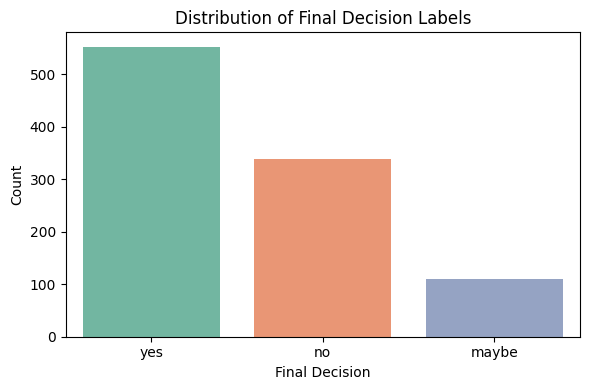

In [ ]:
# ---------------------------
# Plot 1: Distribution of Labels
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='final_decision', data=df, palette='Set2')
plt.title("Distribution of Final Decision Labels")
plt.xlabel("Final Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("label_distribution.png")
plt.show()


# Figure 4.1: Distribution of final decision labels in the PCA-labeled subset (n=1000) of the PubMedQA dataset.

# Explanation:
# This bar chart shows the distribution of yes, no, and maybe answers as annotated by human experts. The relatively balanced presence of all three labels suggests that the dataset provides a fair representation of different biomedical conclusions, which is essential for training an unbiased model.

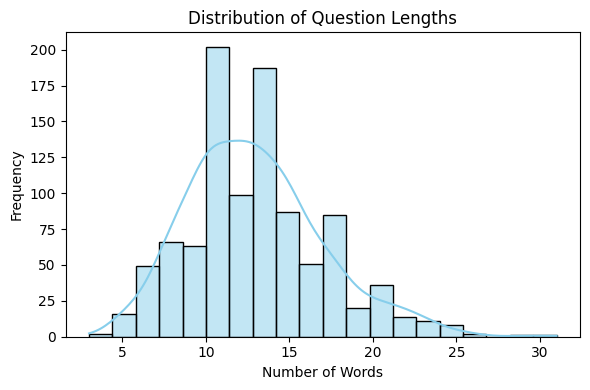

In [ ]:
# ---------------------------
# Plot 2: Question Length Distribution
# ---------------------------
df['question_length'] = df['question'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.histplot(df['question_length'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("question_length_distribution.png")
plt.show()


# Figure Caption:

# Figure 4.2: Histogram showing the distribution of question lengths (in words) in the dataset.

# Explanation:
# The histogram indicates that most biomedical questions in the dataset range between 5 and 15 words. This observation helps in choosing appropriate input sequence lengths for NLP models and supports the assumption that biomedical questions are often short and specific.



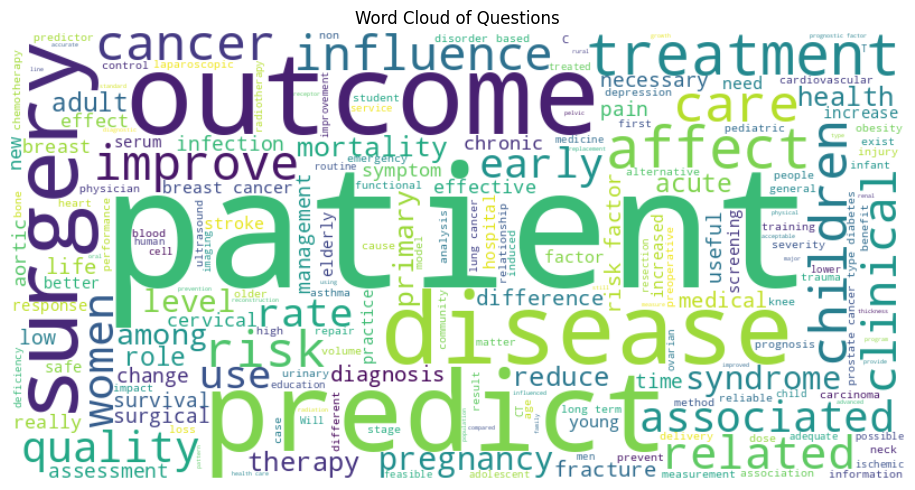

In [ ]:
# ---------------------------
# Plot 3: Word Cloud for Questions
# ---------------------------
text = " ".join(str(q) for q in df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.tight_layout()
plt.savefig("question_wordcloud.png")
plt.show()


# Figure Caption:

# Figure 4.3: Word cloud depicting the most frequent terms used in biomedical questions.

# Explanation:
# The word cloud highlights key terms such as “effect,” “treatment,” “patients,” and “risk,” reflecting the clinical focus of the dataset. Such insights are valuable for understanding the domain vocabulary and enhancing tokenization strategies for downstream tasks.

In [ ]:
# ---------------------------
# Plot 4: PCA on Bag-of-Words for Questions
# ---------------------------
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['question'].astype(str)).toarray()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

fig = px.scatter(df, x='pca-one', y='pca-two', color='final_decision',
                 title="PCA of Question Vectors Colored by Final Decision",
                 labels={"final_decision": "Label"})
fig.write_image("pca_scatter.png")
fig.show()


# Figure Caption:

# Figure 4.4: Principal Component Analysis (PCA) projection of question vectors, colored by final decision labels.

# Explanation:
# PCA was applied to high-dimensional bag-of-words vectors of questions, reducing them to two dimensions for visualization. The scatter plot reveals distinct clusters corresponding to different labels, indicating semantic separability among the classes—a promising signal for classification models.



In [ ]:
#pip install -U kaleido


<ipython-input-20-eedc7cc3751f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




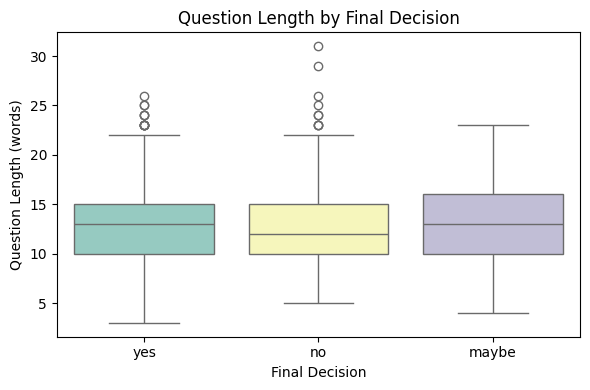

In [ ]:
# ---------------------------
# Plot 5: Heatmap of Question Length vs Label
# ---------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x='final_decision', y='question_length', data=df, palette='Set3')
plt.title("Question Length by Final Decision")
plt.xlabel("Final Decision")
plt.ylabel("Question Length (words)")
plt.tight_layout()
plt.savefig("question_length_vs_label.png")
plt.show()


# Figure Caption:

# Figure 4.5: Box plot showing variation in question length across final decision categories.

# Explanation:
# This visualization compares how long questions are in each class. Interestingly, ‘maybe’ questions tend to have slightly longer lengths, possibly due to additional qualifiers or ambiguity. This trend may inform future feature engineering or model interpretation steps.



In [ ]:
# ---------------------------
# Flowchart: QA Pipeline
# ---------------------------
dot = Digraph(comment='PubMedQA Flowchart')
dot.attr(rankdir='LR', size='10')

dot.node('A', 'Load PCA-Labeled Subset (1000 Records)')
dot.node('B', 'Preprocessing (Clean Text)')
dot.node('C', 'EDA (Length, Labels, Words)')
dot.node('D', 'Visualization (Graphs, PCA, WordCloud)')
dot.node('E', 'Model Training / Explanation (Future Work)')

dot.edges(['AB', 'BC', 'CD', 'DE'])

dot.render('pubmedqa_flowchart', format='png', cleanup=False)
dot.view()

'pubmedqa_flowchart.pdf'